# 1.5 Método de *punto fijo*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/1_Ecuaciones_de_una_variable/1.5_Metodo_de_punto_fijo.ipynb)

In [4]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Funciones en python

In [5]:
def graficar(f, x_i, x_f, num=1000):
        plt.style.use('seaborn')
        plt.ion()
        """
        Gráfica de funciones algebraicas
        :param f: función, previamente definida
        :param x_i: límite inferior del intervalo
        :param x_f: límite superior del intervalo
        :param num: división del intervalo
        :return: gráfica de la función
        """
        x = np.linspace(x_i, x_f, num)
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.plot(x, f(x))
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        #plt.show()
        
        return None
    
def met_punto_fijo(g, p_0, tol=1e-4, n=200, verbose=True, print_error=False, deploy_error=False):
        """
        Método del punto fijo
        :param g: Funcion transformada -> punto fijo
        :param p_0: semilla
        :param tol: toleracia, criterio de parada
        :param n: número máximo de iteraciones, criterio de parada
        :param verbose:
        :param print_error:
        :param deploy_error:
        :return: solución exacta o aproximada, si tiene.
        """
        i = 1
        lista_errores = list()
        while i <= n:
            try:
                p_i = g(p_0)
                e_abs = abs(p_0 - p_i)
                lista_errores.append(e_abs)
                if verbose:
                    print(f'ite {i:<2}: p_{i - 1:<2}={p_0:.5f} p_{i:<2}={p_i:.7f}'
                    f' | e_abs: {e_abs:e}')
                if g(p_i) == p_i:
                    if print_error:
                        print(f'error x iteración: {lista_errores}')
                    print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                    if deploy_error:
                        return lista_errores, p_i
                    else:
                        return p_i

                if e_abs < tol:
                    if print_error:
                        print(f'error x iteración: {lista_errores}')
                    print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                    if deploy_error:
                        return lista_errores, p_i
                    else:
                        return p_i

            except OverflowError:
                print('solución no encontrada, OverflowError')
                return None
            p_0 = p_i
            i += 1
        print('solución no encontrada, iteraciones agotadas')
        return None    

- Un *punto fijo* para una función es un número en el que el valor de la función no cambia cuando se aplica la función.

- El número p es un *punto fijo* para una función dada $g$ si $g(p) = p$

En esta sección, consideramos el problema de encontrar soluciones para los problemas de *punto fijo* y la conexión entre los problemas *punto fijo* y aquellos para encontrar la raíz que queremos resolver. Los problemas para encontrar la raíz de *punto fijo* son clase equivalentes en el siguiente sentido:

* Dado un problema para encontrar la raíz $f(p)=  50$, podemos definir funciones $g$ con un *punto fijo* en $p$ en diferentes formas, por ejemplo,


$g(x) = x − f(x)$ o  $g(x) = x + 3 f(x)$


* Por otra parte, si la función $g$ tiene un punto fijo en $p$, entonces la función definida por 

\begin{equation}
f (x) = x − g(x)
\end{equation}


tiene un cero en p.

A pesar de que los problemas que queremos resolver se encuentran en la forma para encontrar la raíz, la forma del punto fijo es más fácil analizar y ciertas elecciones de  *punto fijo* conducen a técnicas muy poderosas para encontrar la raíz

Ahora, para calcular una aproximación de un punto fijo de una función $g$ es posible aplicar el siguiente
procedimiento:

1. Seleccionar un punto inicial $p_0$.
2. Calcular $g(p_0)$ y nombrarlo como $p_1$.
3. Si $g(p_1) \neq p_1$, repetir los pasos 2 y 3 para $p_1$.
   
Este procedimiento recibe el nombre de método de punto fijo.

### El **método** explicado paso a paso:

**Paso 1:**  Obtener la transformación  $ x = g(x_i)$

**Paso 2:**  La raíz aproximada de  $x_{i+1} = g(x_i)$

**Paso 3:**  Calcular el error: 

$e = |\frac{x_{i-1} - x_i}{x_{x-1}}|$

$eabs =  |x_i - x_{i-1}|$


**Gráficamente de puede interpretar el método de punto fijo**

<img src="imagenes/mpuntofijo1.png"/>

*Imagen del libro Matemáticas para ingeniería. Métodos numéricos*

Determine cualquier punto fijo de la función $g(x) = x2 − 2$.



un *punto fijo* de p para g tiene la propiedad de que


\begin{equation}
p = g(p) = p^2 − 2
\end{equation}


lo cual implica que

\begin{equation}
0 = p^2 − p − 2 = (p + 1)(p − 2).
\end{equation}

Un punto fijo para $g$ ocurre precisamente cuando la gráfica de $y=g(x)$ intersecta la gráfica $"y = x"$, por lo $g$ tiene dos puntos fijos $p = -1$ y el otro en $p = 2$.

**Gráficamente de puede interpretar el métedo de punto fijo**

<img src="imagenes/mpuntofijo2.png"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*

***************

### Ejemplo práctico 1

Resolver la ecuación $e^x - 3sin(x) - 3x = 0$

1. Donde su semille es $p_o$=2.5:


**Datos:**

$f(x) = 2*e^x - 5x$

$x = 0.4e{x}$

$x_0 = 0$


**Procedimiento:**

**Paso 1:** Se recomeinda graficar antes de empezar el calculo

**Paso 2:** Optener la ríz aproximada de $x_{i+1}$

\begin{equation}
x_{i+1} = g(x_i)
\end{equation}

**Paso 3:** Calcular el error

\begin{equation}
e = |\frac {x_{i+1} - x_i}{x_{i+1}}|
\end{equation}


*Nota:* El procedimiento de los *Pasos del 2 al 5* se realizan ejecutando el *met_punto_fijo()*

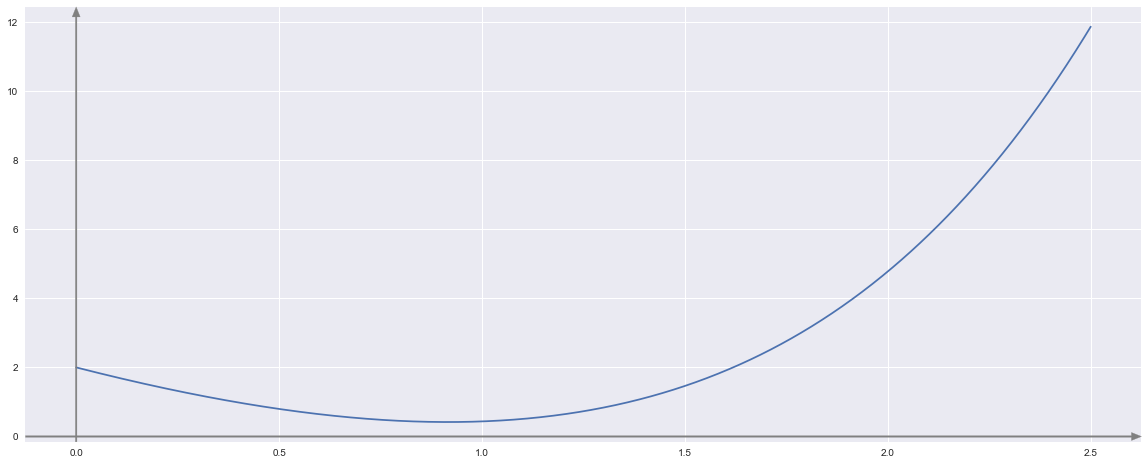

In [17]:
f = lambda x: 2*np.exp(x) - 5*x
graficar(f, 0, 2.5)


In [18]:
g = lambda x: 0.4*np.exp(x)
p_0 = 0
# Función que grafica
met_punto_fijo(g, p_0, tol=1e-4, n=200, verbose=True, print_error=False, deploy_error=False)

ite 1 : p_0 =0.00000 p_1 =0.4000000 | e_abs: 4.000000e-01
ite 2 : p_1 =0.40000 p_2 =0.5967299 | e_abs: 1.967299e-01
ite 3 : p_2 =0.59673 p_3 =0.7264680 | e_abs: 1.297381e-01
ite 4 : p_3 =0.72647 p_4 =0.8271057 | e_abs: 1.006377e-01
ite 5 : p_4 =0.82711 p_5 =0.9146763 | e_abs: 8.757061e-02
ite 6 : p_5 =0.91468 p_6 =0.9983869 | e_abs: 8.371057e-02
ite 7 : p_6 =0.99839 p_7 =1.0855602 | e_abs: 8.717330e-02
ite 8 : p_7 =1.08556 p_8 =1.1844393 | e_abs: 9.887907e-02
ite 9 : p_8 =1.18444 p_9 =1.3075414 | e_abs: 1.231021e-01
ite 10: p_9 =1.30754 p_10=1.4788291 | e_abs: 1.712877e-01
ite 11: p_10=1.47883 p_11=1.7551220 | e_abs: 2.762929e-01
ite 12: p_11=1.75512 p_12=2.3136614 | e_abs: 5.585394e-01
ite 13: p_12=2.31366 p_13=4.0445515 | e_abs: 1.730890e+00
ite 14: p_13=4.04455 p_14=22.8342305 | e_abs: 1.878968e+01
ite 15: p_14=22.83423 p_15=3302480722.4422755 | e_abs: 3.302481e+09
ite 16: p_15=3302480722.44228 p_16=inf | e_abs: inf
>>> Solución exacta encontrada después de 16 iteraciones: x->inf


c:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf